In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# read the data
df=pd.read_csv('movies.csv')

In [4]:
pd.set_option('display.max_rows',None)

In [6]:
# looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [214]:
# looking at the missing data
#df.isna().sum()
for col in df.columns:
    missing_values=df[col].isna().sum()
    print('{}:{}'.format(col,missing_values))

name:0
rating:77
genre:0
year:0
released:2
score:3
votes:3
director:0
writer:3
star:1
country:3
budget:2171
gross:189
company:17
runtime:4


In [215]:
# looking at the data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [216]:
# filling missing values with zeros
df.fillna(0,inplace=True)

In [217]:
# converting votes, budget, gross, runtime 
df['votes']=df['votes'].astype('int64')
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['runtime']=df['runtime'].astype('int64')

In [218]:
# Splitting the released column into country of release
df['country_of_release']=df.released.str.split('(',expand=True)[1].str[:-1]


In [219]:
# Overwriting the released column into only date of release
df['released']=df.released.str.split('(',expand=True)[0]

In [220]:
# correcting the year column
df['correct_year']=df['released'].str.split(',',expand=True)[1]

In [221]:
# converting year to numeric
#df['correct_year']=pd.to_numeric(df['correct_year'])
#df['correct_year']=df['correct_year'].astype('int64')


In [222]:
# Order our Data a little bit to see

df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
# to drop duplicates if there is any
df.drop_duplicates()


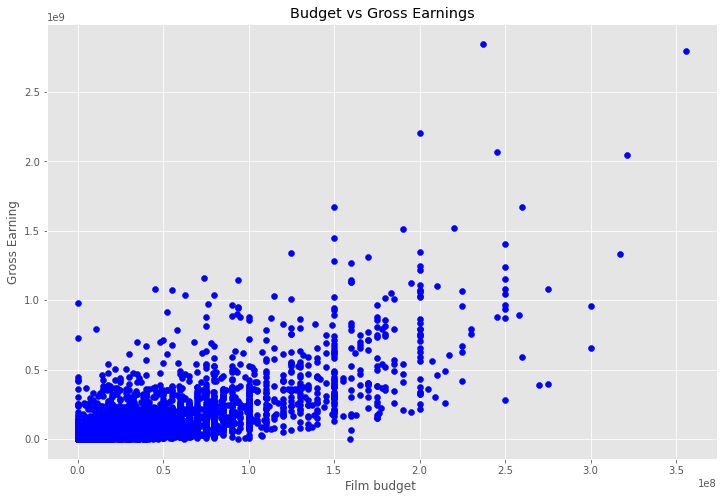

In [236]:
# Scatter plot with gross vs budget
plt.scatter(x=df['budget'],y=df['gross'],color='blue')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Film budget ')
plt.ylabel('Gross Earning')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

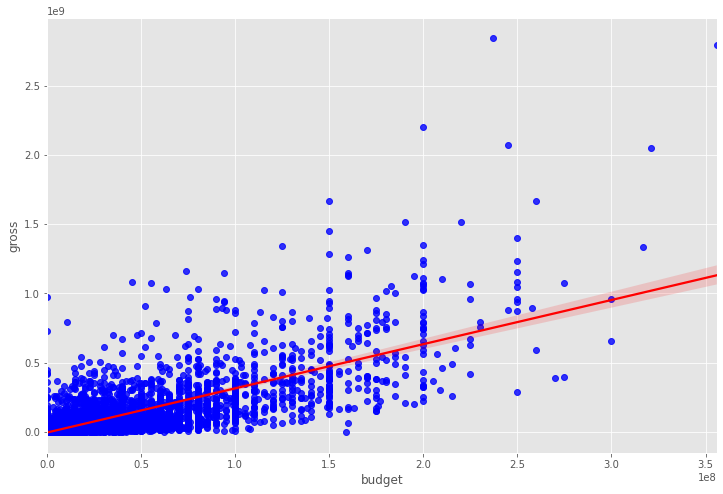

In [224]:
# Plotting budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"blue"},line_kws={"color":"red"})

In [225]:
# looking at correlation
df.corr(method="pearson") # kendall, spearman 

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


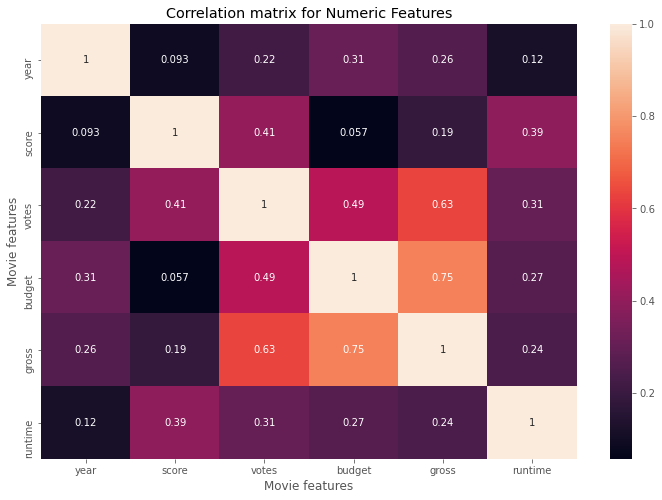

In [226]:
correlation_matrix = df.corr() 

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [227]:
# looking at categorial data expample: Company
df_numerized=df
for col in df_numerized.columns:
    if(df_numerized[col].dtype=='object'):
        df_numerized[col]=df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes    #assigning to categorial data random values

In [228]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_of_release,correct_year
5445,533,6,0,2009,610,7.8,1100000,1155,1779,2335,56,237000000,2847246203,2254,162,56,29
7445,535,6,0,2019,153,8.4,903000,162,744,2242,56,356000000,2797501328,1607,181,56,39
3045,6896,6,6,1997,616,7.8,1100000,1155,1779,1596,56,200000000,2201647264,2254,194,56,17
6663,5144,6,0,2015,612,7.8,876000,1125,2551,525,56,245000000,2069521700,1541,138,56,35
7244,536,6,0,2018,161,8.4,897000,162,744,2242,56,321000000,2048359754,1607,149,56,38


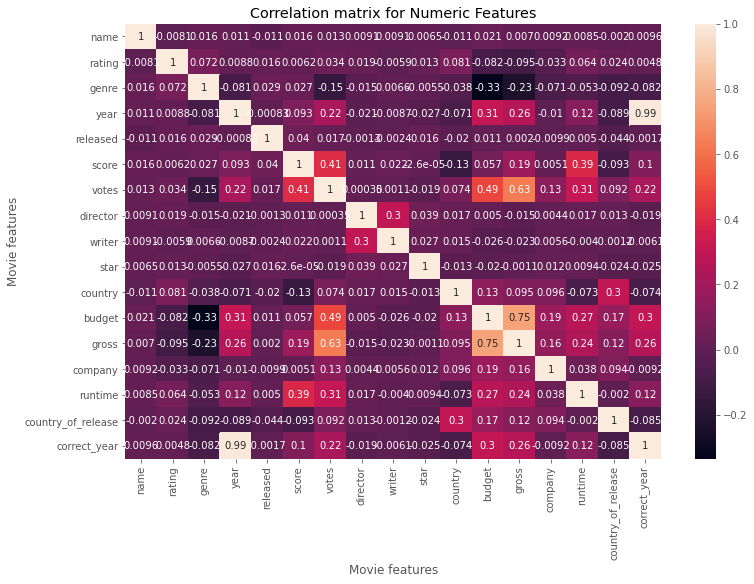

In [230]:
correlation_matrix = df_numerized.corr() 

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [231]:
stacked_matrix=correlation_matrix.stack()


In [195]:
stacked_matrix

name                name                  1.000000
                    rating               -0.008069
                    genre                 0.016355
                    year                  0.011453
                    released             -0.011223
                    score                 0.016377
                    votes                 0.013038
                    director              0.009079
                    writer                0.009081
                    star                  0.006472
                    country              -0.010737
                    budget                0.020548
                    gross                 0.006989
                    company               0.009211
                    runtime               0.008483
                    country_of_release   -0.001968
                    correct_year         -0.009264
rating              name                 -0.008069
                    rating                1.000000
                    genre      

In [232]:
sorted_matrix=stacked_matrix.sort_values()

In [233]:
sorted_matrix[(sorted_matrix)>0.5]

votes               gross                 0.632870
gross               votes                 0.632870
                    budget                0.750157
budget              gross                 0.750157
correct_year        year                  0.992136
year                correct_year          0.992136
name                name                  1.000000
writer              writer                1.000000
runtime             runtime               1.000000
company             company               1.000000
gross               gross                 1.000000
budget              budget                1.000000
country             country               1.000000
star                star                  1.000000
director            director              1.000000
votes               votes                 1.000000
score               score                 1.000000
released            released              1.000000
year                year                  1.000000
genre               genre      